In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import math
import seaborn as sns
sns.set_style()

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.rc('text.latex', preamble=r'\usepackage{color}')
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': smallfs, 'axes.titlesize':smallfs})
plt.rc('axes', labelsize=smallfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels



In [2]:
fname = "../../data/ms2_noise-in-OD/model_highRes_ambiguityNoiseuniformInitial_seeds0-1000.ncdf"
data = xr.open_dataset(fname, engine="netcdf4")


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


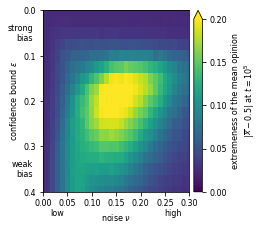

In [3]:
cmap="viridis"; 
vmax=0.2; vmin=0
ticks=[0,0.05,0.1,0.15,0.2]; extend="max"
uniformIC = True
fig = plt.figure()
ax1 = plt.axes()
a = data.sel({"t":1e5}).mean(dim="id").x
if uniformIC:
    cbarlabel = r"extremeness of the mean opinion"+"\n"+r" $|\overline{x}-0.5|$ at $t=10^5$"
if uniformIC:
    a = abs(a-0.5)
c=a.mean(dim="seed").plot(ax=ax1, add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
cb = plt.colorbar(c, extend=extend, ticks=ticks, shrink=1.0, aspect=20, pad=0.025)
cb.set_label(cbarlabel, size=smallfs)
cb.outline.set_edgecolor('k')
cb.ax.tick_params(labelsize=smallfs)
cb.outline.set_edgecolor('k')
ax1.set_xlim(0,0.3)
ax1.set_ylim(0.4,0.0)
ax1.set_ylabel(r"confidence bound $\epsilon$", fontsize=smallfs)
ax1.text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(0.05, -0.12,r"low", ha="left", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(0.95, -0.12,r"high", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.set_yticks([0,0.1,0.2,0.3,0.4])
ax1.set_xlabel(r"noise $\nu$", fontsize=smallfs)
ax1.set_title(r"")
ax1.tick_params(direction='out')
ax1.tick_params(bottom=True, left=True)
for sp in ax1.spines: ax1.spines[sp].set_color("k")
fig.set_size_inches(9/2.54, 8/2.54, forward=True)
plt.subplots_adjust(left=0.08*2-0.005, bottom=0.15, top=0.95, right=0.85)
plt.savefig("figs/meanOp-0.5-abs_ambiguity_uniform.png",dpi=600)
plt.savefig("figs/meanOp-0.5-abs_ambiguity_uniform.pdf")



## Further exploration

adaptationNoise 0.14238955
selectionNoise 0.0321779
exogenousNoise 0.09879065


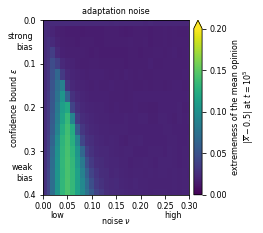

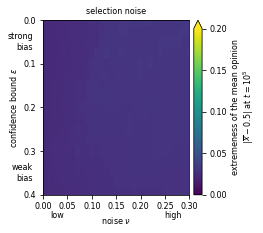

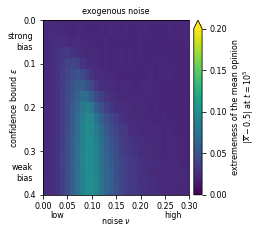

In [4]:
for noise_type in ["adaptationNoise", "selectionNoise", "exogenousNoise"]:
    fname = f"../../data/ms2_noise-in-OD/model_highRes_{noise_type}uniformInitial_seeds0-1000.ncdf"

    data = xr.open_dataset(fname, engine="netcdf4")

    cmap="viridis"; 
    vmax=0.2; vmin=0
    ticks=[0,0.05,0.1,0.15,0.2]; extend="max"
    uniformIC = True
    fig, ax1 = plt.subplots(1,1)
    a = data.sel({"t":1e5}).mean(dim="id").x
    if uniformIC:
        cbarlabel = r"extremeness of the mean opinion"+"\n"+r" $|\overline{x}-0.5|$ at $t=10^5$"
    if uniformIC:
        a = abs(a-0.5)
    print(noise_type, a.mean(dim="seed").values.max())
    c=a.mean(dim="seed").plot(ax=ax1, add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
    cb = plt.colorbar(c, extend=extend, ticks=ticks, shrink=1.0, aspect=20, pad=0.025)
    cb.set_label(cbarlabel, size=smallfs)
    cb.outline.set_edgecolor('k')
    cb.ax.tick_params(labelsize=smallfs)
    cb.outline.set_edgecolor('k')
    ax1.set_xlim(0,0.3)
    ax1.set_ylim(0.4,0.0)
    ax1.set_ylabel(r"confidence bound $\epsilon$", fontsize=smallfs)
    ax1.text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
    ax1.text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
    ax1.text(0.05, -0.12,r"low", ha="left", va="center", transform=ax1.transAxes, fontsize=smallfs)
    ax1.text(0.95, -0.12,r"high", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
    ax1.set_yticks([0,0.1,0.2,0.3,0.4])
    ax1.set_xlabel(r"noise $\nu$", fontsize=smallfs)
    ax1.set_title(rf"{noise_type[:-5]} noise")
    ax1.tick_params(direction='out')
    ax1.tick_params(bottom=True, left=True)
    for sp in ax1.spines: ax1.spines[sp].set_color("k")
    fig.set_size_inches(9/2.54, 8/2.54, forward=True)
    plt.subplots_adjust(left=0.08*2-0.005, bottom=0.15, top=0.92, right=0.85)
    
    #plt.savefig("figs/meanOp-0.5-abs_ambiguity_uniform.png",dpi=600)
    #plt.savefig("figs/meanOp-0.5-abs_ambiguity_uniform.pdf")



ambiguity 0.04079918


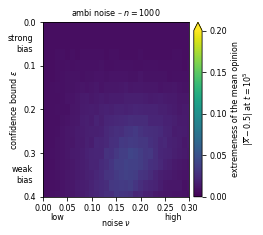

In [6]:
fname = "../../data/ms2_noise-in-OD/SA/model_highRes_n1000uniformInitial_seeds.ncdf"
noise_type= "ambiguity"
data = xr.open_dataset(fname, engine="netcdf4")

cmap="viridis"; 
vmax=0.2; vmin=0
ticks=[0,0.05,0.1,0.15,0.2]; extend="max"
uniformIC = True
fig, ax1 = plt.subplots(1,1)
a = data.sel({"t":1e5}).mean(dim="id").x
if uniformIC:
    cbarlabel = r"extremeness of the mean opinion"+"\n"+r" $|\overline{x}-0.5|$ at $t=10^5$"
if uniformIC:
    a = abs(a-0.5)
print(noise_type, a.mean(dim="seed").values.max())
c=a.mean(dim="seed").plot(ax=ax1, add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmap) 
cb = plt.colorbar(c, extend=extend, ticks=ticks, shrink=1.0, aspect=20, pad=0.025)
cb.set_label(cbarlabel, size=smallfs)
cb.outline.set_edgecolor('k')
cb.ax.tick_params(labelsize=smallfs)
cb.outline.set_edgecolor('k')
ax1.set_xlim(0,0.3)
ax1.set_ylim(0.4,0.0)
ax1.set_ylabel(r"confidence bound $\epsilon$", fontsize=smallfs)
ax1.text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(0.05, -0.12,r"low", ha="left", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.text(0.95, -0.12,r"high", ha="right", va="center", transform=ax1.transAxes, fontsize=smallfs)
ax1.set_yticks([0,0.1,0.2,0.3,0.4])
ax1.set_xlabel(r"noise $\nu$", fontsize=smallfs)
ax1.set_title(rf"{noise_type[:-5]} noise – $n=1000$")
ax1.tick_params(direction='out')
ax1.tick_params(bottom=True, left=True)
for sp in ax1.spines: ax1.spines[sp].set_color("k")
fig.set_size_inches(9/2.54, 8/2.54, forward=True)
plt.subplots_adjust(left=0.08*2-0.005, bottom=0.15, top=0.92, right=0.85)

